### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

train_images = gzip.open('train-images-idx3-ubyte.gz','r')
test_images = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images1 = 60000
num_images2 = 10000

In [2]:
train_images.read(16)
buf = train_images.read(image_size * image_size * num_images1)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32).reshape(num_images1, image_size**2)/255
X_images_train = X_train.reshape(num_images1, 1, image_size, image_size)

In [3]:
test_images.read(16)
buf1 = test_images.read(image_size * image_size * num_images2)
X_test = np.frombuffer(buf1, dtype=np.uint8).astype(np.float32).reshape(num_images2, image_size**2)/255
X_images_test = X_test.reshape(num_images2, 1, image_size, image_size)

In [4]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)  
buf = f.read(num_images1)
Y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
Y_train=Y_train.astype("float32")
Y_train

array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

In [5]:
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)  
buf = f.read(num_images1)
Y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
Y_test=Y_test.astype("float32")
Y_test

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [6]:
X_test.shape,Y_test.shape, X_train.shape,Y_train.shape

((10000, 784), (10000,), (60000, 784), (60000,))

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd

In [8]:
featuresTrain = torch.from_numpy(X_train)
targetsTrain = torch.from_numpy(Y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(X_test)
targetsTest = torch.from_numpy(Y_test).type(torch.LongTensor) # data type is long

##### Task 2. Augmentation

##### Task 3. Neural Network

In [9]:
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net,self).__init__()
        
        #convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        #max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        #convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2=nn.ReLU()
        
        #max pool2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        #fully connected layers
        
        self.fc1=nn.Linear(32*4*4,1000)
        self.fc2=nn.Linear(1000,100)
        self.fc3=nn.Linear(100,10)
        

    def forward(self,x):
        #convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        #max pool 1
        out = self.maxpool1(out)
        
        #convolution 2
        out=self.cnn2(out)
        out = self.relu2(out)
        
        #max pool 2
        out=self.maxpool2(out)
        out=out.view(out.size(0), -1)
        
        #fully connected layers
        
        out=self.fc1(out)
        out=self.fc2(out)
        out=self.fc3(out)
        
        
        
        return out
         
        

##### Task 4. Train loop

In [10]:
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)


train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

model = CNN_Net()
error = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.item() , accuracy))

Iteration: 500  Loss: 0.12363836169242859  Accuracy: 96 %
Iteration: 1000  Loss: 0.0535251721739769  Accuracy: 97 %
Iteration: 1500  Loss: 0.0557883158326149  Accuracy: 98 %
Iteration: 2000  Loss: 0.018906336277723312  Accuracy: 98 %


##### Task 5. Loss plot

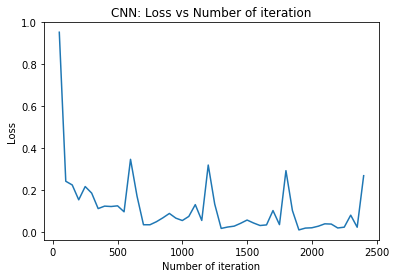

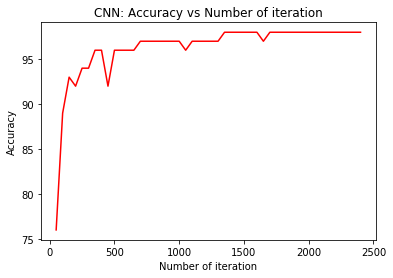

In [12]:
import matplotlib.pyplot as plt 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

##### Task 6. Test set accuracy

In [13]:
from sklearn.metrics import accuracy_score
prediction=model(featuresTest.reshape(10000,1,28,28))
score=accuracy_score(torch.max(prediction, 1)[1], Y_test)
score

0.9845

##### Task 7. Inference

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3]


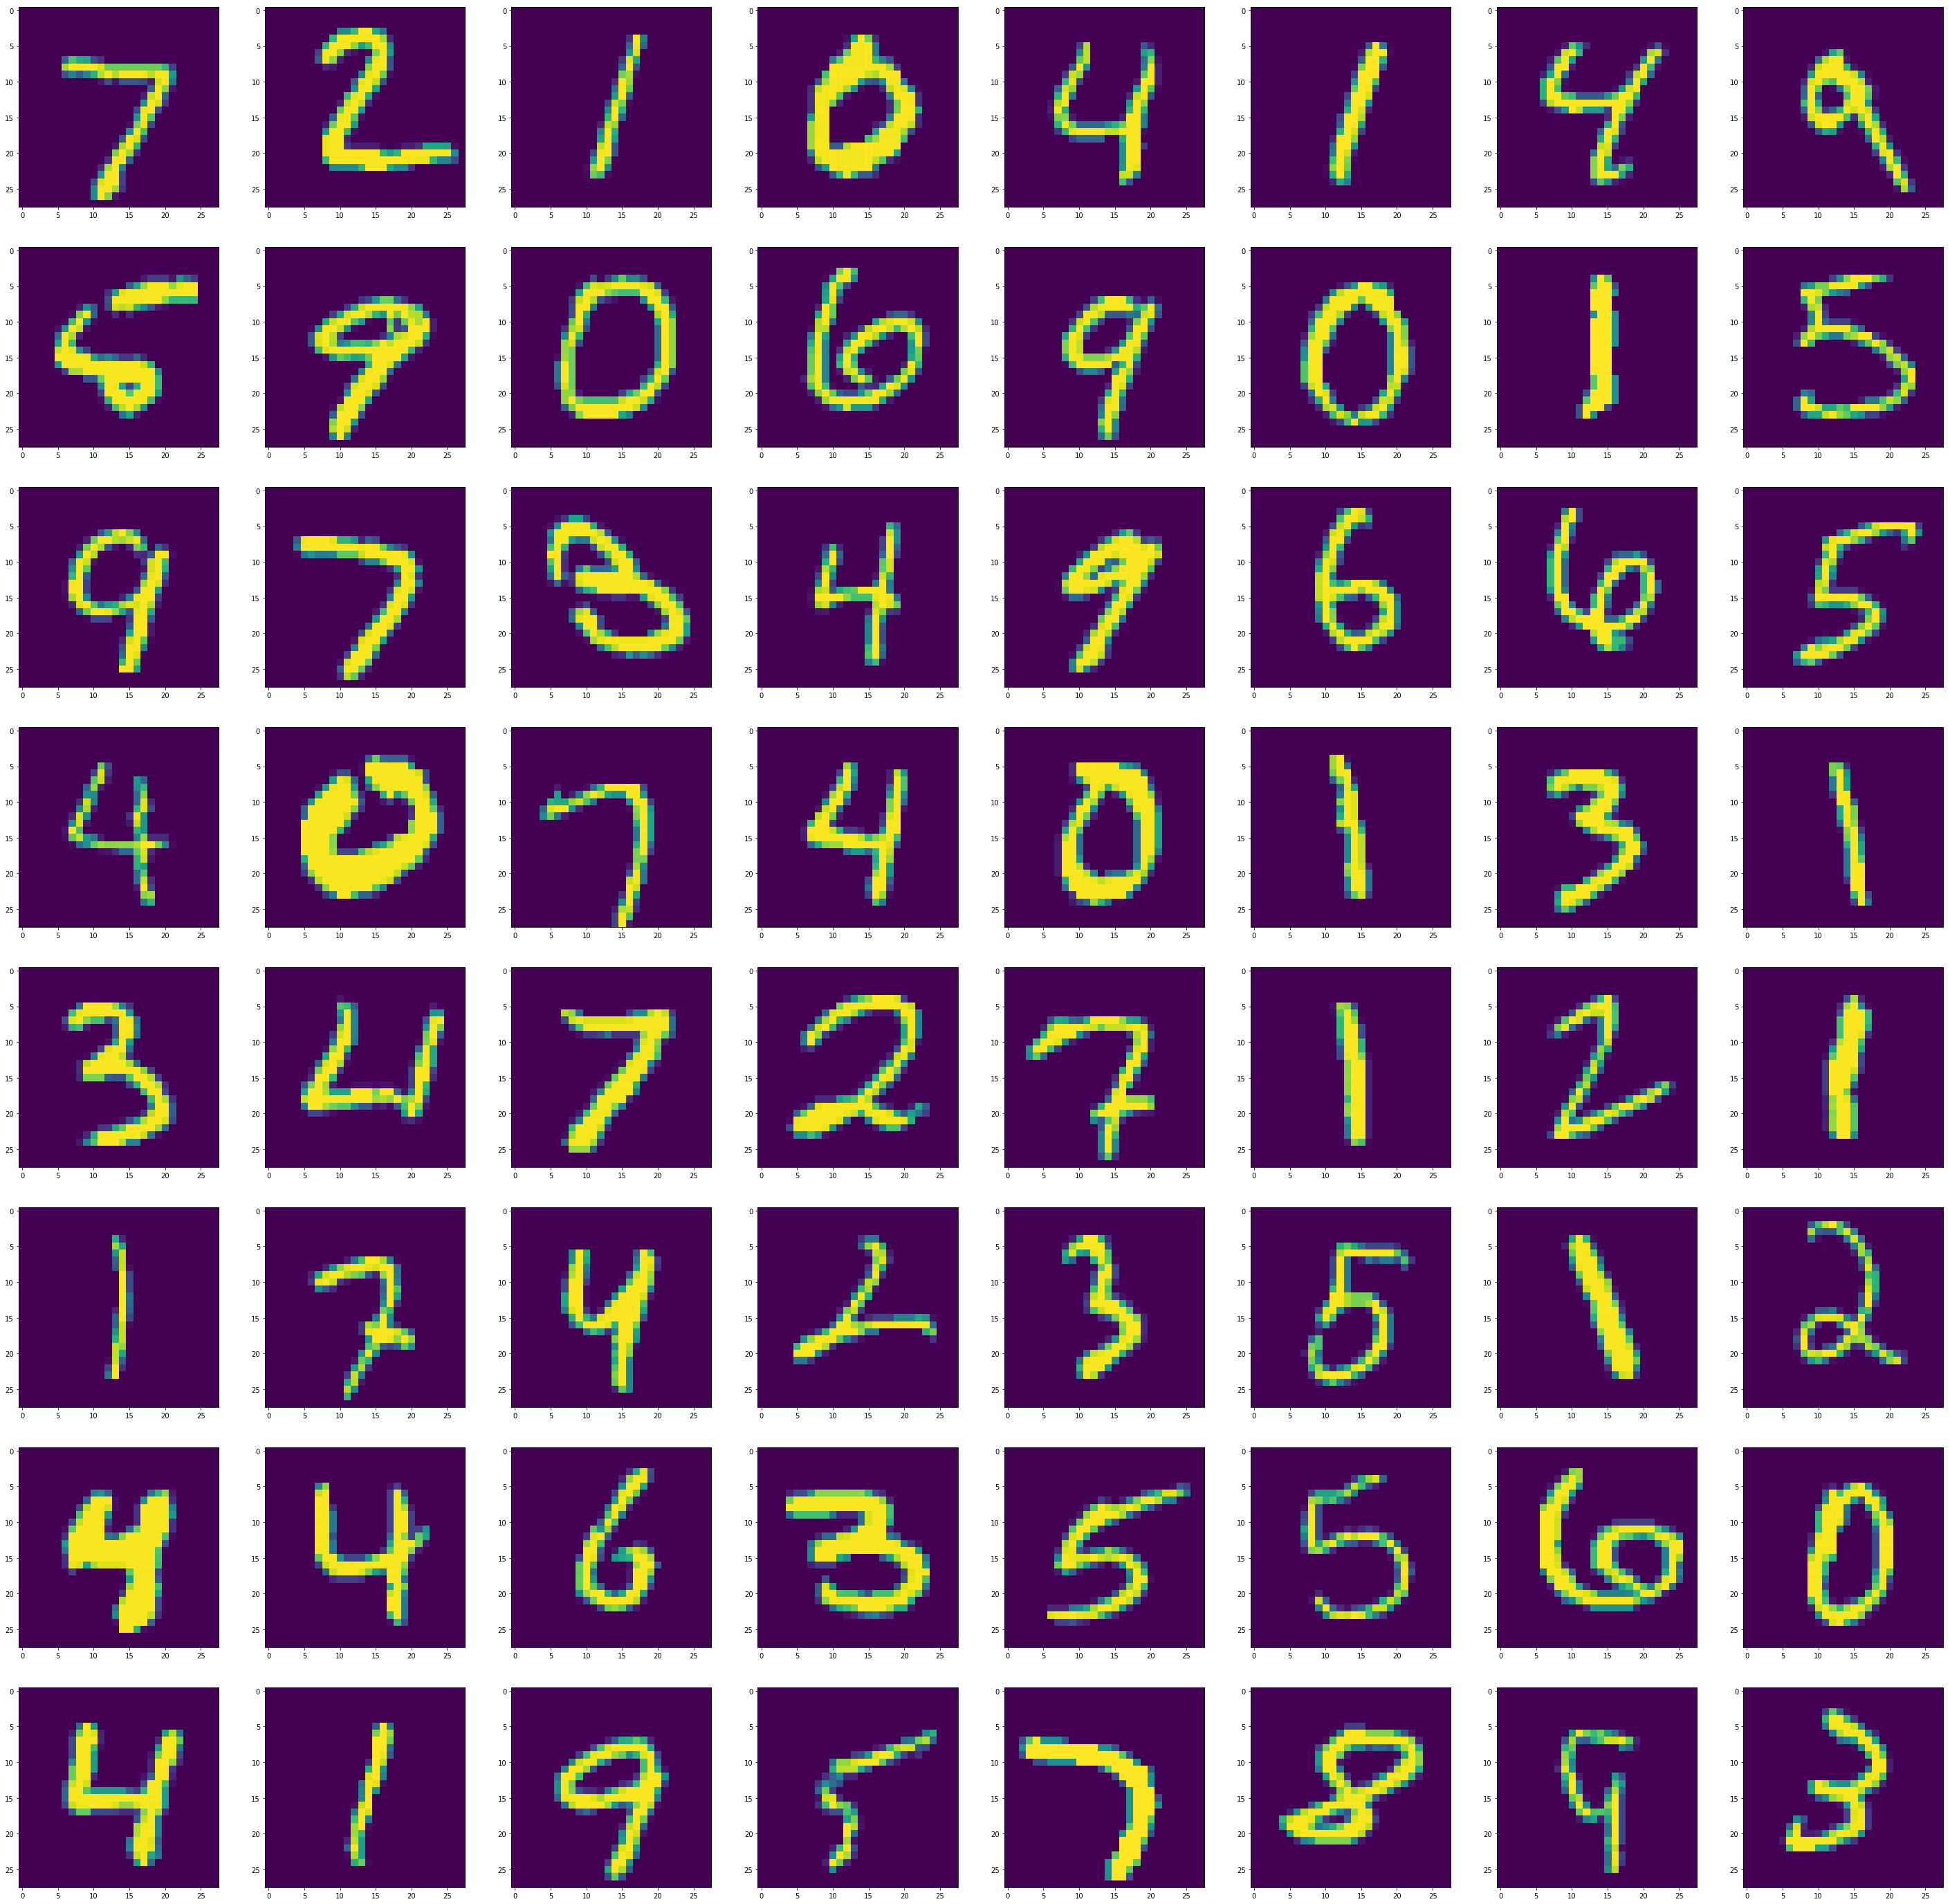

In [14]:
# some of the test images
fig = plt.figure(figsize=(50, 50))  # width, height in inches

for i in range(64):
    sub = fig.add_subplot(8, 8, i + 1)
    sub.imshow(X_images_test[i,0,:,:], interpolation='nearest')
print(Y_test[:64].astype("int64"))

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0]


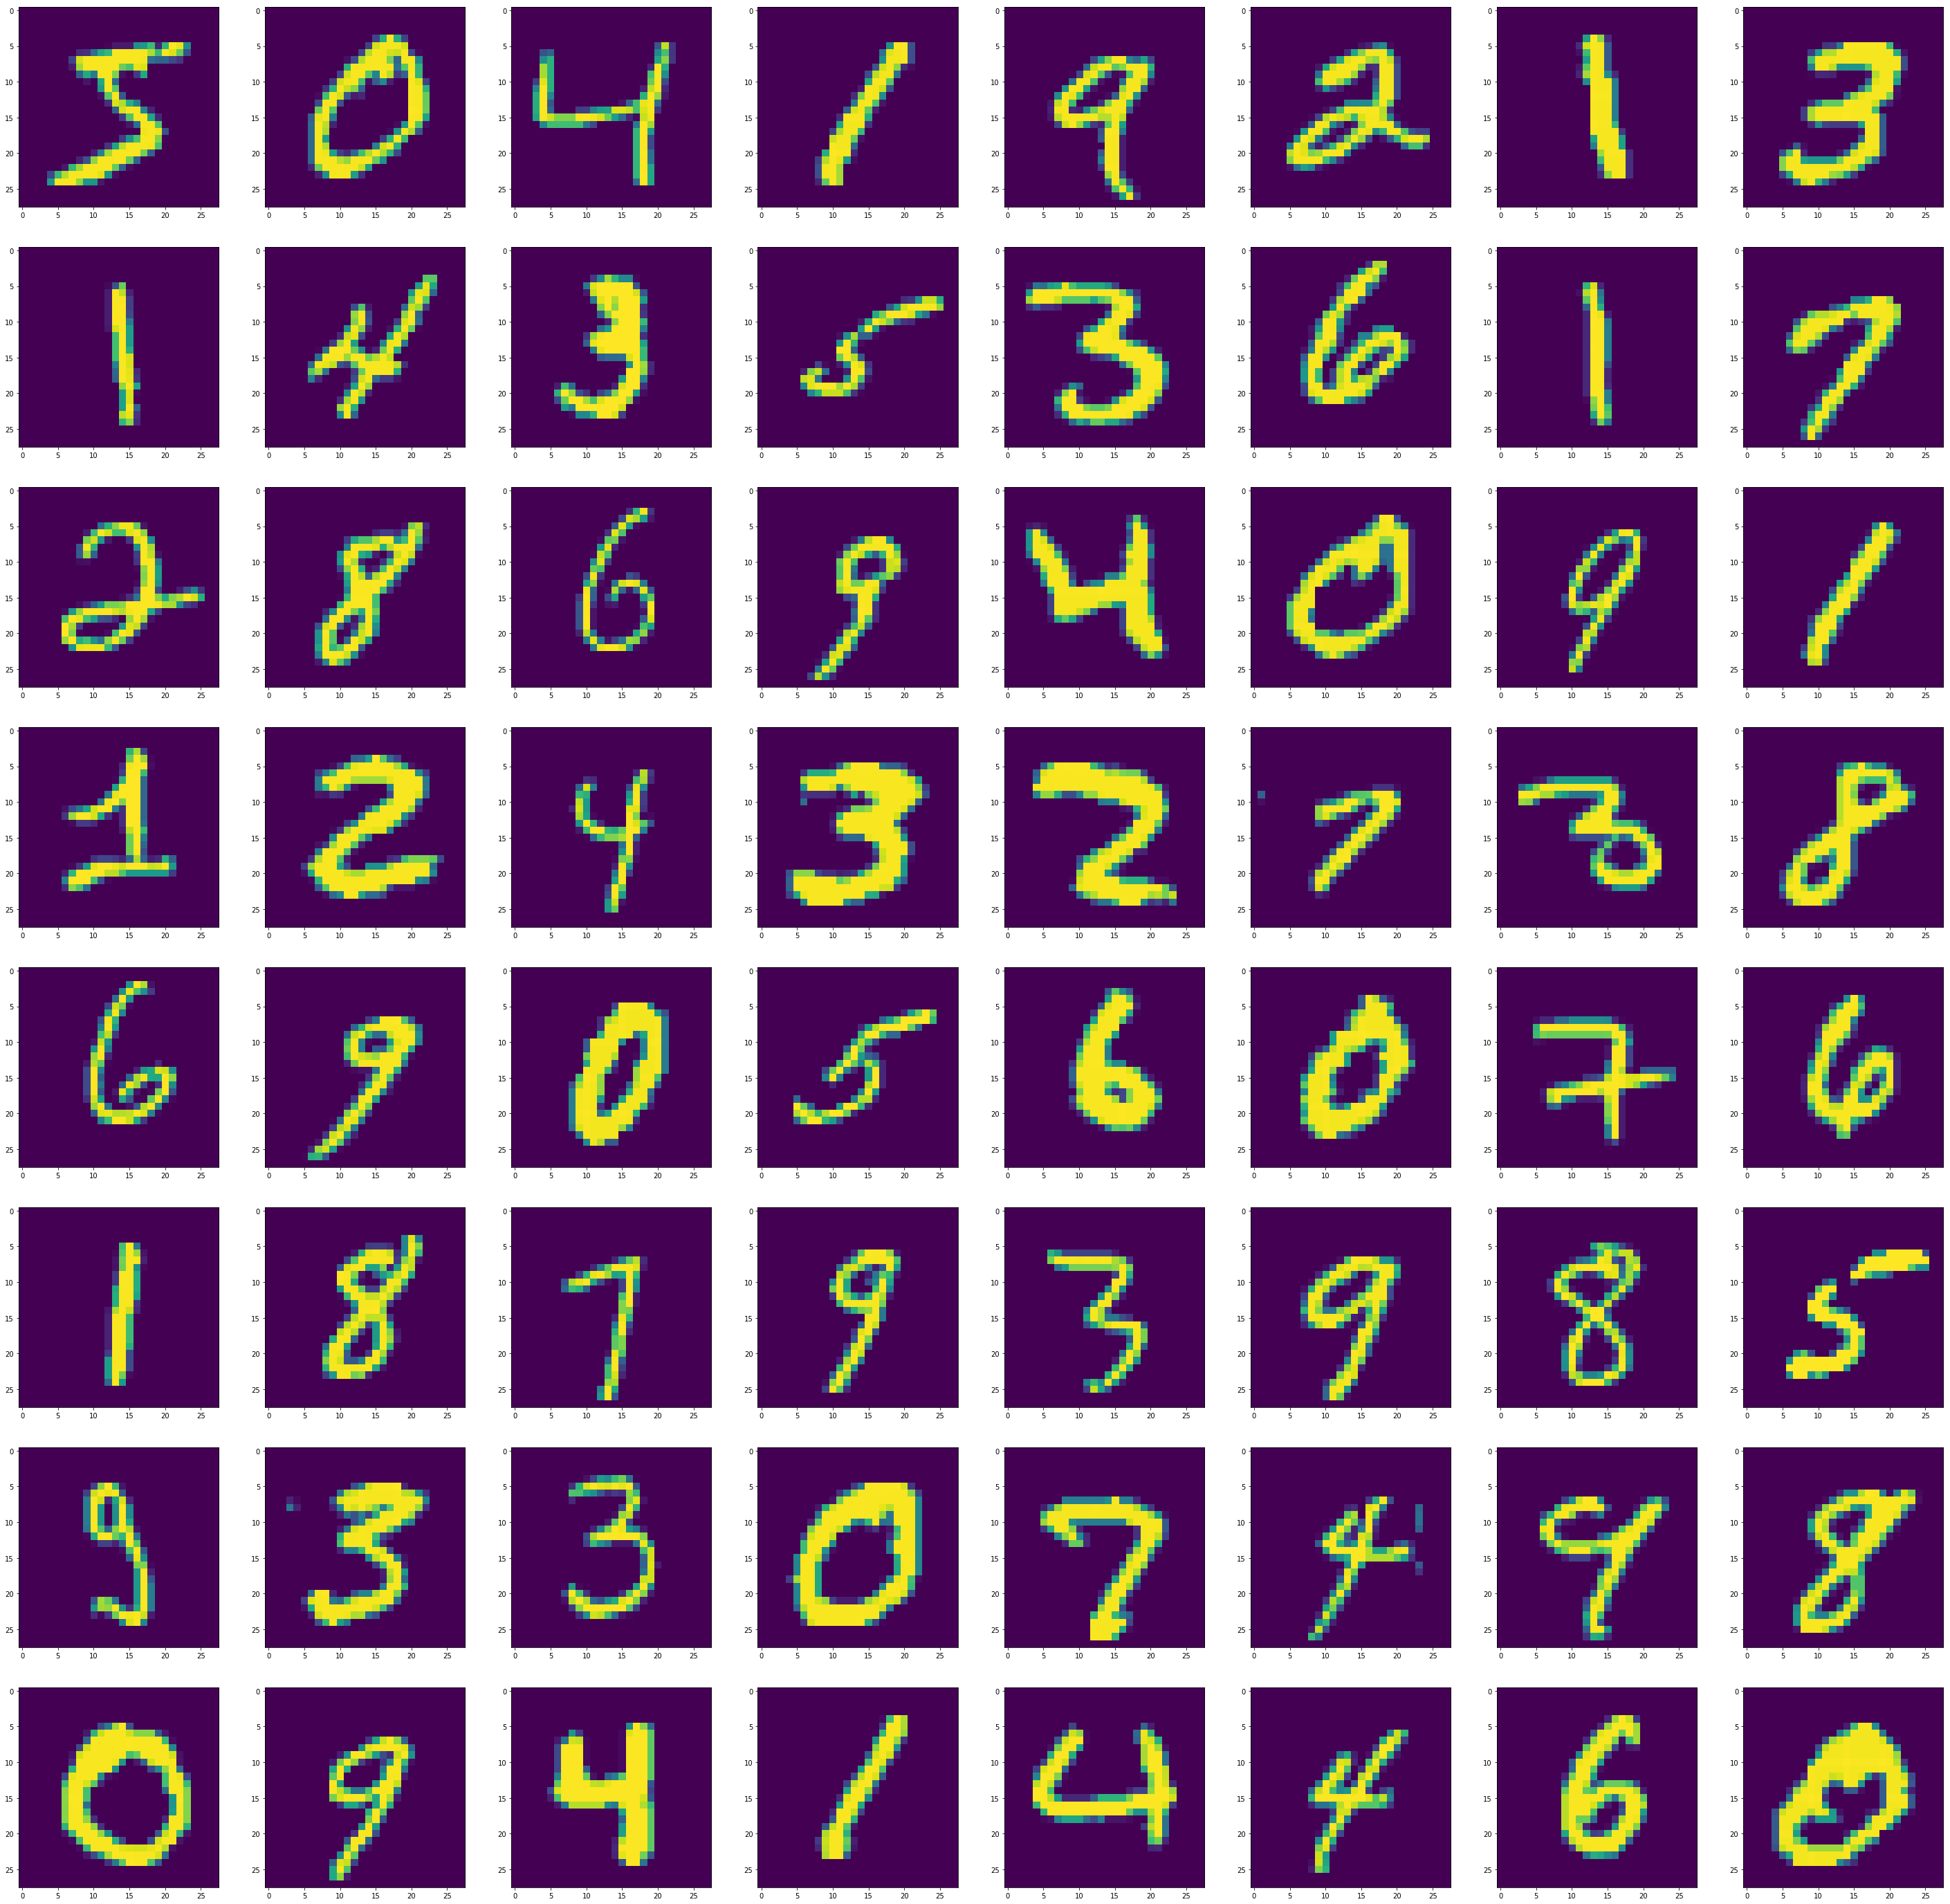

In [15]:
# some of the train images
fig = plt.figure(figsize=(50, 50))  # width, height in inches

for i in range(64):
    sub = fig.add_subplot(8, 8, i + 1)
    sub.imshow(X_images_train[i,0,:,:], interpolation='nearest')
print(Y_train[:64].astype('int64'))